""" Rb Rydberg Rabi oscillations
    Preston Huft, May 2019    
    I think Mark's result for three level rate eqs is incorrect...
"""

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import complex_ode,odeint
from scipy.integrate import solve_ivp
import sympy
from sympy import MatrixSymbol,MatAdd,MatMul,Identity,I,Matrix,symbols
from sympy.utilities.lambdify import lambdify, implemented_function
from sympy.utilities.iterables import flatten
import time
from math import pi,sqrt

In [2]:
## physical constants
e = 1.60217662e-19 # [C]
a0 = 5.22e-11 # [m]
hbar = 1.0545718e-34 # [J s]
c = 3e8 # [m]
e0 = 8.85418782e-12 # [m^-3 kg^-1 s^4 A^2]

In [3]:
###############################################################################
## METHODS and GLOBAL PARAMETERS
###############################################################################

## Methods

def cc(z): 
    return np.conj(z)

## "GLOBAL" VARIABLES (scope excludes method bodies)

threedB = (1-1/np.e) # "3dB" down, or ~ 63 % of an initial amplitude

comp time = 0.002991199493408203[s]


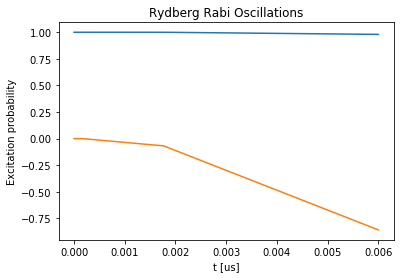

In [24]:
###############################################################################
## Two-photon Rabi Oscillations, e.g. to a Rydberg level
###############################################################################

def Intensity(P,w0,r,A=None,r0=None):
    """ Gaussian beam intensity at radius 'r' for
        'P' power
        'w0' beam waist
        'A' area
    """
    if r0 is None:
        r0 = 0
    if A is None:
        A = pi*w0**2
    
    return (P/A)*np.exp(-(r-r0)**2/(2*w0**2))

def derivs(y0,t,D1,D2,O1,O2):
    """ Returns RHS of optical bloch eqs for current values at time t"""
    c_g,c_r,c_e = y0

    # straight out of Mark's notes
    D = D1+D2
    d = D1-D2
    
    dcg = 1j*(cc(O1)*c_e-D*c_g)/2
    dcr = 1j*(d*c_e+O1*c_g+cc(O2)*c_r)/2
    dce = 1j*(D*c_r+O2*c_e)/2

    return np.array([dcg,dcr,dce])

## test a single Rabi frequency
O1 = 2*pi*200 # [MHz]
O2 = 2*pi*20 # [MHz]
D1 = 2*pi*(-2.07) # [MHz]
D2 = 0
D = D1+D2 
d = D1-D2

## initial conditions - system starts in ground state (|F=2,mF=0>)
c_g = 1 + 0j
c_e = 0 + 0j
c_r = 0 + 0j

y0 = np.array([c_g,c_r,c_e]) # bundle i.c.

fig = plt.figure()
ax = fig.add_subplot(111)
# ax.set_ylim((0,1))
ax.set_title('Rydberg Rabi Oscillations')
ax.set_xlabel('t [us]')
ax.set_ylabel('Excitation probability')

## max pulse duration
t_exp = 6e-3 # [us]  ~ pi/2 time we've been using

stopwatch = time.time()
# func = lambda t,y: derivs(y,t,d,D,O1,O2)
func = lambda t,y: derivs(y,t,D1,D2,O1,O2)
soln = solve_ivp(func,[0,t_exp],y0,#t_eval=np.linspace(0,t_exp,50),
                method='RK45')
ctime = time.time()-stopwatch
print(f"comp time = {ctime}[s]")
# ypts = [abs(y)**2 for y in soln.y[2]]
# ax.plot(soln.t,ypts)
for y in soln.y[:2]:
    ax.plot(soln.t,y)


# ax.legend(loc='upper right')
plt.show()